<a href="https://colab.research.google.com/github/IrfanPavel/Image-Recognition-using-CNN-/blob/main/Image_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [39]:
train_dir = 'drive/MyDrive/cats_and_dogs_small/train'
validation_dir = 'drive/MyDrive/cats_and_dogs_small/validation'
test_dir = 'drive/MyDrive/cats_and_dogs_small/test'


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



Generating batches of Tensor image data


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [45]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))




In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [46]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [47]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=20,
    validation_data= validation_generator,
    validation_steps= 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 566s 6s/step - loss: 0.6972 - acc: 0.5097 - val_loss: 0.6716 - val_acc: 0.6110
Epoch 2/20
100/100 [==============================] - 107s 1s/step - loss: 0.6625 - acc: 0.6003 - val_loss: 0.6348 - val_acc: 0.6380
Epoch 3/20
100/100 [==============================] - 107s 1s/step - loss: 0.6213 - acc: 0.6578 - val_loss: 0.6285 - val_acc: 0.6320
Epoch 4/20
100/100 [==============================] - 107s 1s/step - loss: 0.5722 - acc: 0.7061 - val_loss: 0.5830 - val_acc: 0.6820
Epoch 5/20
100/100 [==============================] - 108s 1s/step - loss: 0.5593 - acc: 0.7083 - val_loss: 0.5712 - val_acc: 0.6920
Epoch 6/20
100/100 [==============================] - 107s 1s/step - loss: 0.4921 - acc: 0.7532 - val_loss: 0.5999 - val_acc: 0.6840
Epoch 7/20
100/100 [==============================] - 107s 1s/step - loss: 0.4723 - acc: 0.7718 - val_loss: 0.6362 - val_acc: 0.6510
Epoch 8/20
100/100 [==============================] - 107s 1s/step - 

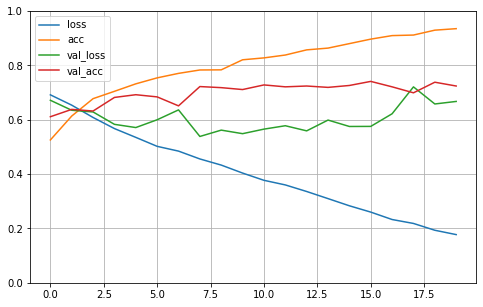

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
model.save("model.h5")

In [51]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [52]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [55]:
history = model.fit_generator(
    

  train_generator,
  steps_per_epoch = 100,
  epochs = 100,
  validation_data= validation_generator,
  validation_steps = 50

)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
100/100 [==============================] - 114s 1s/step - loss: 0.6825 - acc: 0.5430 - val_loss: 0.6856 - val_acc: 0.5150


In [56]:
model.save('project_cnn.h5')


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()